# Computergestützte Mathematik zur Analysis

Prof. Dr. Rüdiger Braun

17.12.2020

In [1]:
from sympy import *
init_printing()

# Vektoren und Matrizen

In [3]:
v = Matrix([1,2,3])
v

In [4]:
w = Matrix(1,3,[4,5,6])  # 1x3-Matrix
w

In [5]:
v[1]

In [6]:
w[1]

In [7]:
w * v

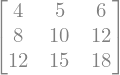

In [8]:
v * w

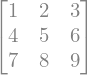

In [9]:
A = Matrix(3,3,range(1,10))
A

In [10]:
A[1,0]

In [11]:
A.row(1)

In [12]:
A.col(1)

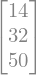

In [13]:
A * v

In [14]:
#A * w # ShapeError

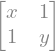

In [15]:
x = S('x')
y = S('y')
B = Matrix([[x,1], [1,y]])
B

# variable Vektoren

In [23]:
a, b, alpha = symbols('a b alpha')
a

In [25]:
x = symbols('x0:10')
x

In [28]:
x[0]

In [27]:
v = Matrix(1, len(x), x)
v

# Spezielle Matrizen

Einheitsmatrix

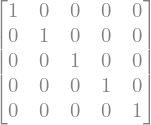

In [29]:
eye(5)

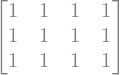

In [31]:
ones(3,4)

In [32]:
zeros(2,1)

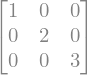

In [33]:
diag(1,2,3)

In [34]:
diag(range(5))

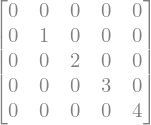

In [35]:
diag(*range(5))   # der Stern packt die Elemente aus

# Operationen

In [36]:
A.det()

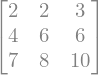

In [37]:
E = eye(3)
C = A + E
C

In [38]:
C.det()

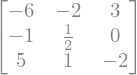

In [39]:
C1 = C**(-1)
C1

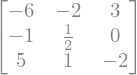

In [41]:
C.inv()

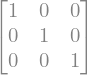

In [42]:
C * C1

# Inspektion

In [43]:
A.shape

In [44]:
v.shape

Es gibt keine Vektoren

In [45]:
v

In [46]:
type(v) 

sympy.matrices.dense.MutableDenseMatrix

# Manipulation von Matrizen

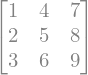

In [47]:
A.T  # Transposition

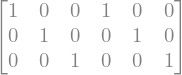

In [48]:
Matrix.hstack(eye(3), eye(3)) 

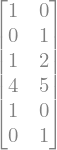

In [49]:
B = Matrix.vstack(eye(2), A[:2,:2], eye(2))
B

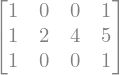

In [50]:
B.reshape(3,4)

In [52]:
flatten(B)

In [53]:
type(flatten(v))

list

Wir sind also raus aus `sympy`

# Hilbert-Matrizen

als Beispiel für schlecht konditionierte Matrizen

In [54]:
def hilbert(i,j):
    return 1/(1+i+j)

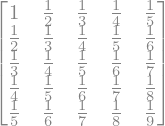

In [55]:
H = Matrix(5,5,hilbert)
H

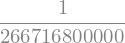

In [56]:
H.det()

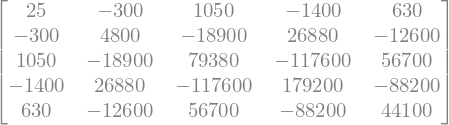

In [57]:
H**(-1)

In [58]:
N = 12

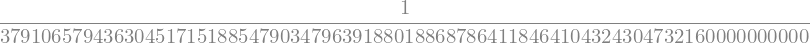

In [59]:
H = Matrix(N, N, hilbert)
H.det()

In [60]:
H1 = H**(-1)

In [61]:
H1[0,2]

Vergleich mit Numerik

In [62]:
import numpy as np

In [64]:
Hn = np.empty((N,N))
for i in range(N):
    for j in range(N):
        Hn[i,j] = 1/(1+i+j)
np.linalg.det(Hn)

In [65]:
np.linalg.inv(Hn)[0,2]

In [66]:
%%timeit
H**(-1)

261 ms ± 7.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
np.linalg.inv(Hn)

23.2 µs ± 611 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Rang einer Matrix

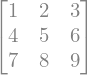

In [68]:
A

In [69]:
A.rank()

In [71]:
x = S('x')

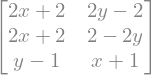

In [72]:
M = Matrix(3, 2, [2*x+2, 2*y-2, 2*x+2, -2*y+2, y-1, x+1])
M

In [73]:
M.rank()

Glauben wir das?

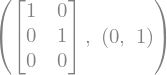

In [74]:
M.rref()   # Zeilenstufenform

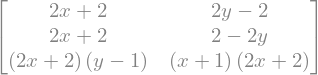

In [75]:
M1 = M.elementary_row_op('n->kn', row=2, k=2*x+2)
M1

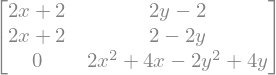

In [76]:
M2 = M1.elementary_row_op('n->n+km', row1=2, row2=0, k=1-y).expand()
M2

außerdem

* `n<->m` Vertauschung von `row1` und `row2`

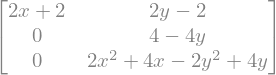

In [77]:
M3 = M2.elementary_row_op('n->n+km', row1=1, row2=0, k=-1)
M3

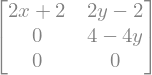

In [78]:
M4 = M3.elementary_row_op('n->n+km', row1=2, row2=1, k=-M3[2,1]/M3[1,1])
M4

Im letzten Schritt haben wir durch $4-4y$ geteilt.  Also gilt das nur für $y\ne1$.

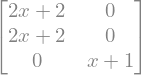

In [79]:
M.subs(y,1)

$$
    \text{rank}(M) = \begin{cases}
        2 & x \ne -1 \\
        1 & x = -1, y \ne 1 \\
        0 & x = -1, y = 1
    \end{cases}
$$

Kein Fehler von `sympy`.

`sympy` rechnet in $\mathbb R(x,y)$.